# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  We observe that the rate of change of the BS call with respect to time is negative and more pronounced near maturity for ATM calls but decreases towards zero for ITM and OTM calls
  
- *Call Option – Spot Price Sensitivity:*  We observe that the rate of change of the BS call with respect to option price is positive and monotonic increasing function regardless the value of the strike price. Approaches 0 for deep out-of-the-money calls and 1 for deep in-the-money calls. Most sensitive (steepest slope) when at-the-money.
  
- *Put Option – Time Sensitivity:*  We observe that the rate of change of the BS put with respect to time is mostly negative and more pronounced near maturity for ATM puts but decreases towards zero for ITM and OTM puts
  
- *Put Option – Spot Price Sensitivity:*  We observe that the rate of change of the BS put with respect to option price is negative and monotonic increasing function regardless the value of the strike price. Approaches -1 for deep in-the-money puts and 0 for deep out-the-money puts. Most sensitive (steepest slope) when at-the-money.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


# S0 = 100
# K = 100
# sigma = .3
# times = np.linspace(1/12, 5, 70)


# call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


# plt.figure(figsize = (12,8))
# plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
# plt.plot(times, call_prices)
# plt.xlabel('Time to Expiration')
# plt.ylabel('Black-Scholes Call Price')
# plt.show()

## Problem (a)

For these parameters of the Strike and Spot, the immediate thing to note is that the value of the call option increases as the time to expiration increases. This makes sense because more time means more opportunity for the stock price to move above the strike price. The option has more time value when there is more time until expiration. 

### At the money call

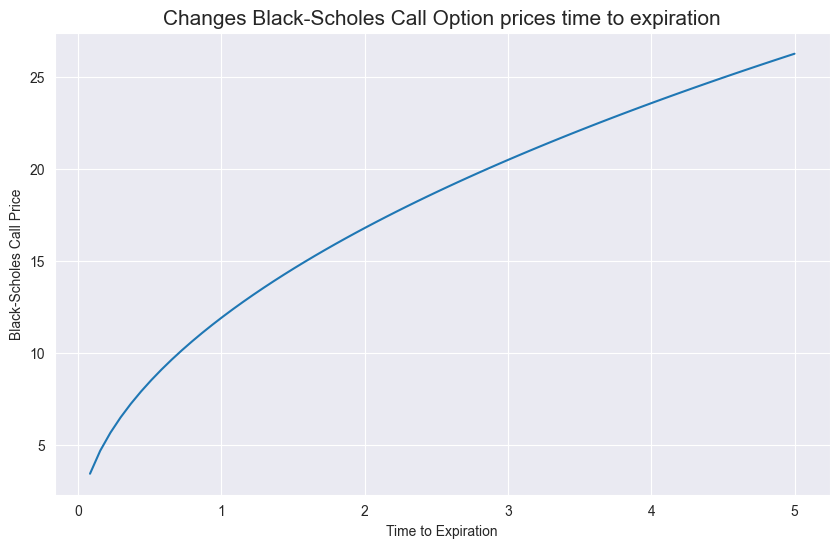

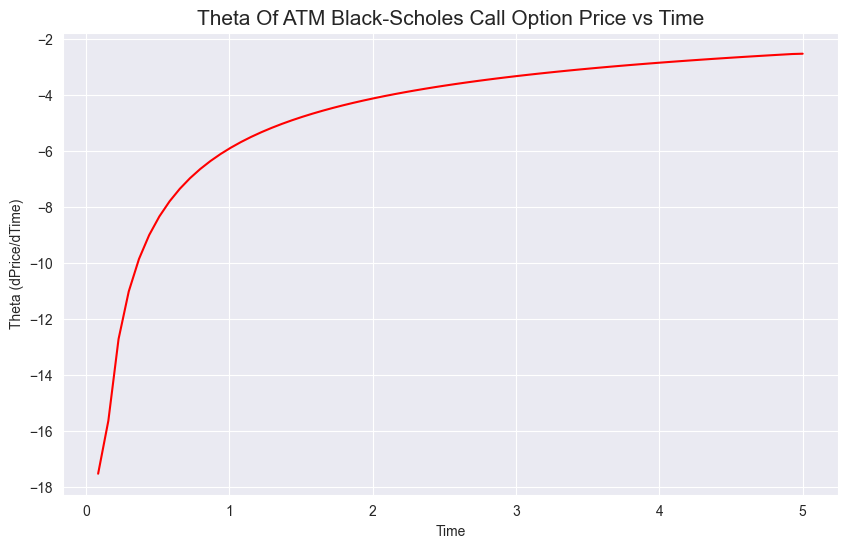

In [3]:
S0 = 100
K = 100
sigma = .3
times = np.linspace(1/12, 5, 70)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (10,6))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 15)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

# Compute the numerical derivative (theta) of the call price with respect to time
theta_call = np.gradient(call_prices[::-1], times)[::-1]

plt.figure(figsize=(10,6))
plt.title("Theta Of ATM Black-Scholes Call Option Price vs Time", size=15)
plt.plot(times, theta_call, color='red')
plt.xlabel('Time')
plt.ylabel('Theta (dPrice/dTime)')
plt.show()

### In the money call

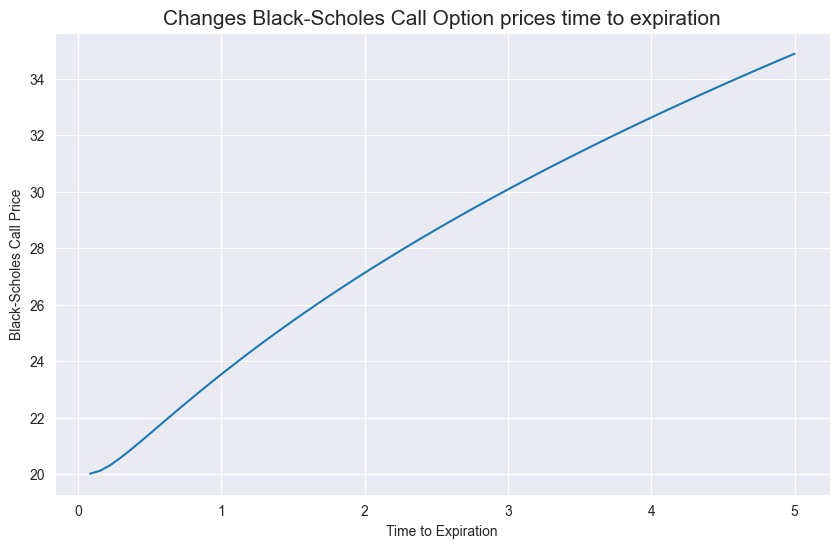

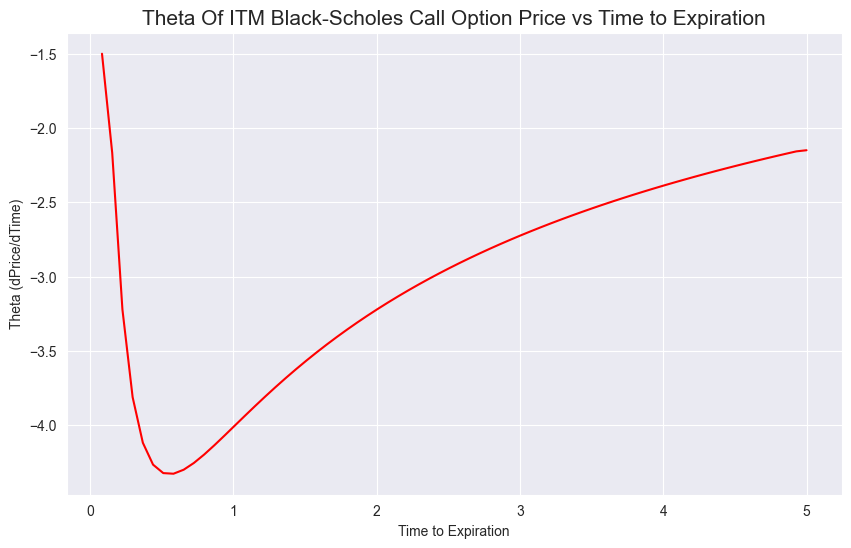

In [4]:
S0 = 100
K = 80
sigma = .3
times = np.linspace(1/12, 5, 70)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (10,6))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 15)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

# Compute the numerical derivative (theta) of the call price with respect to time
theta_call = np.gradient(call_prices[::-1], times)[::-1]

plt.figure(figsize=(10,6))
plt.title("Theta Of ITM Black-Scholes Call Option Price vs Time to Expiration", size=15)
plt.plot(times, theta_call, color='red')
plt.xlabel('Time to Expiration')
plt.ylabel('Theta (dPrice/dTime)')
plt.show()

### Out the money call

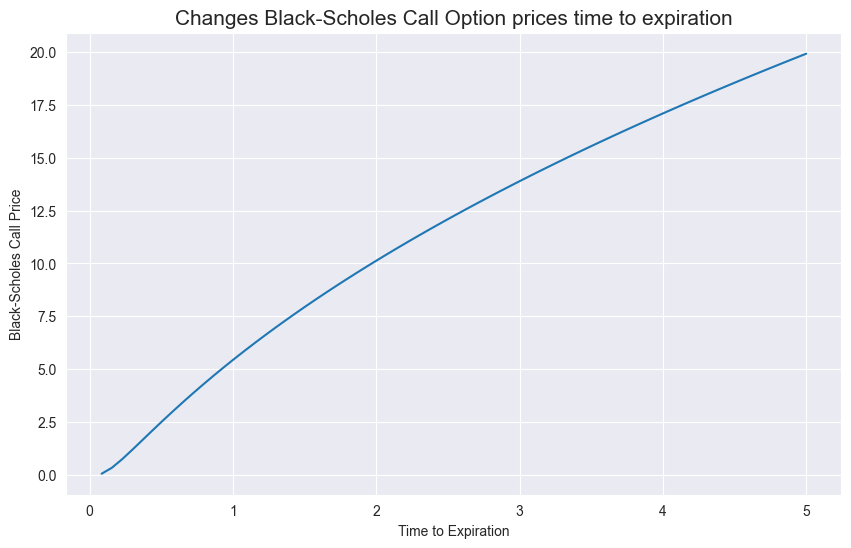

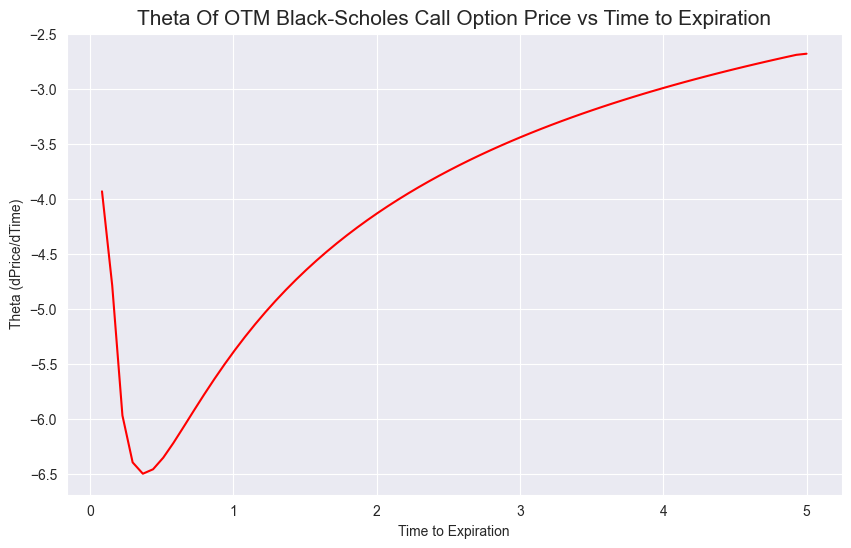

In [5]:
S0 = 100
K = 120
sigma = .3
times = np.linspace(1/12, 5, 70)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (10,6))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 15)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

# Compute the numerical derivative (theta) of the call price with respect to time
theta_call = np.gradient(call_prices[::-1], times)[::-1]

plt.figure(figsize=(10,6))
plt.title("Theta Of OTM Black-Scholes Call Option Price vs Time to Expiration", size=15)
plt.plot(times, theta_call, color='red')
plt.xlabel('Time to Expiration')
plt.ylabel('Theta (dPrice/dTime)')
plt.show()

## Problem (b)

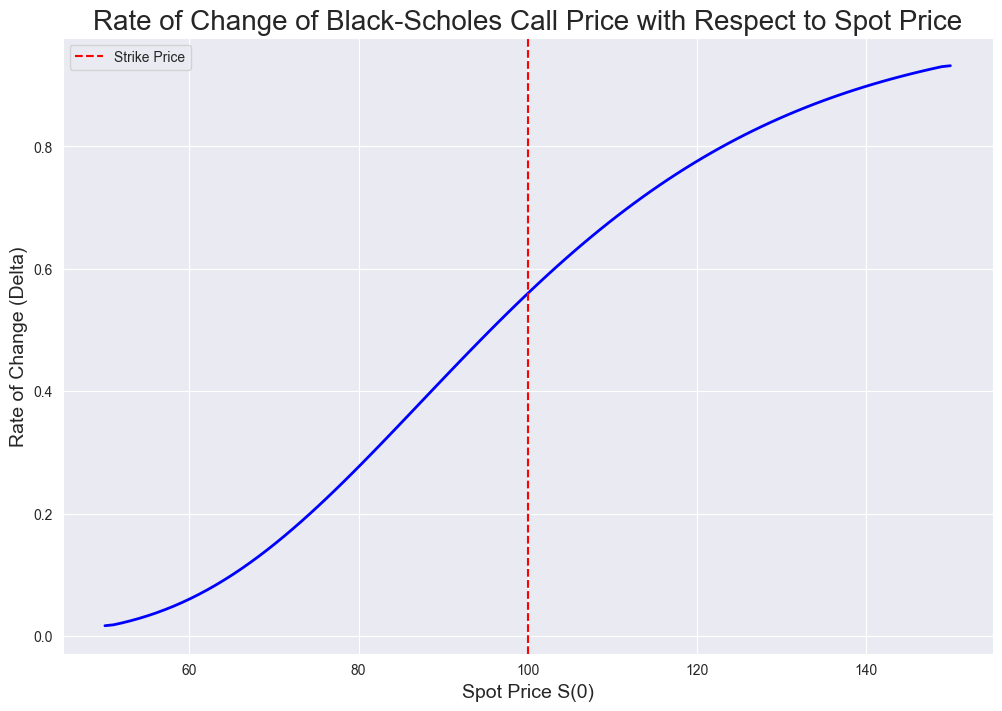

In [9]:
# Create visualization for rate of change with respect to spot price
spot_prices = np.linspace(50, 150, 100)  # Range of spot prices from 50 to 150
K = 100  # Strike price
sigma = 0.3  # Volatility
t = 1  # Time to expiration (1 year)
r = 0  # Risk-free rate

# Calculate call prices
call_prices = [bs_call(S0, K, sigma, t, r) for S0 in spot_prices]

# Calculate rate of change (derivative) using finite differences
delta_prices = np.gradient(call_prices, spot_prices)

plt.figure(figsize=(12, 8))
plt.plot(spot_prices, delta_prices, 'b-', linewidth=2)
plt.title('Rate of Change of Black-Scholes Call Price with Respect to Spot Price', size=20)
plt.xlabel('Spot Price S(0)', size=14)
plt.ylabel('Rate of Change (Delta)', size=14)
plt.grid(True)
plt.axvline(x=K, color='r', linestyle='--', label='Strike Price')
plt.legend()
plt.show()

## Problem (c) - 1 

### At the money put

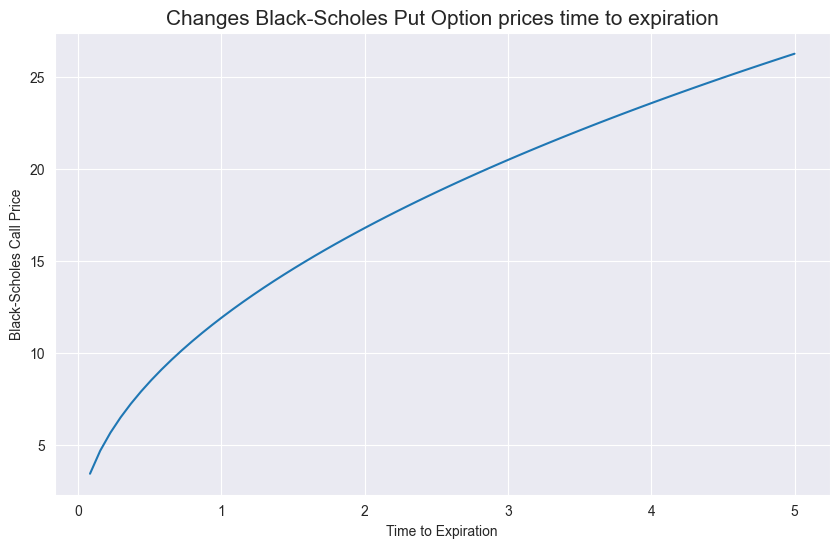

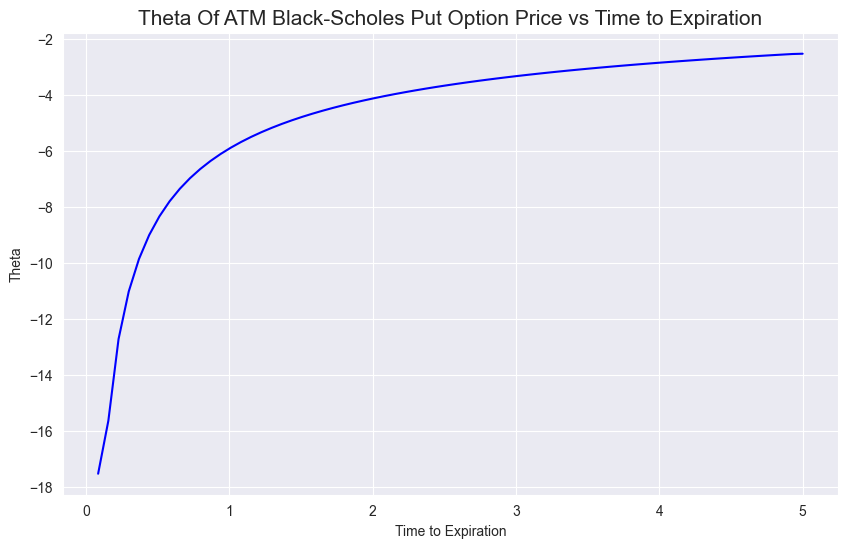

In [34]:
S0 = 100
K = 100
sigma = .3
times = np.linspace(1/12, 5, 70)

put_prices = [bs_put(S0, K, sigma, t=times[i]) for i in range(len(times))]

plt.figure(figsize = (10,6))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 15)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

theta_put = np.gradient(put_prices[::-1], times)[::-1]

plt.figure(figsize = (10,6))
plt.title("Theta Of ATM Black-Scholes Put Option Price vs Time to Expiration", size=15)
plt.plot(times, theta_put, color='blue')
plt.xlabel('Time to Expiration')
plt.ylabel('Theta')
plt.show()

### In the money put

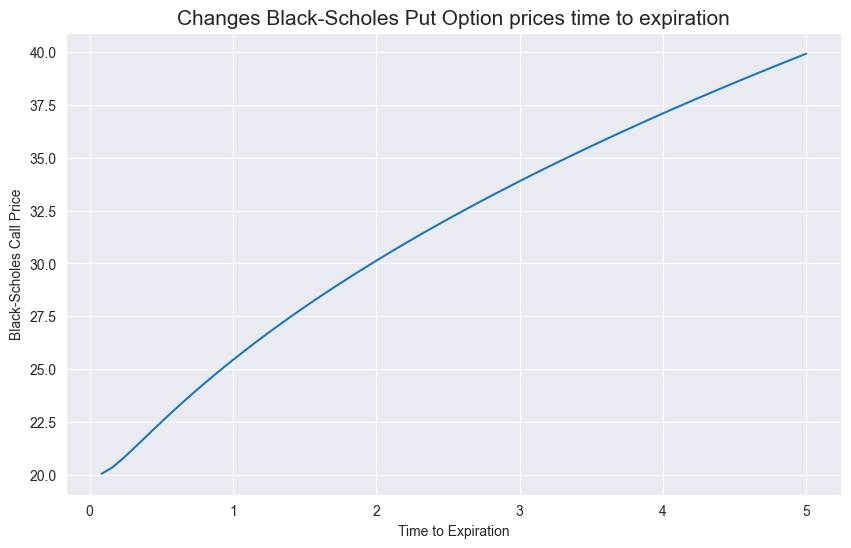

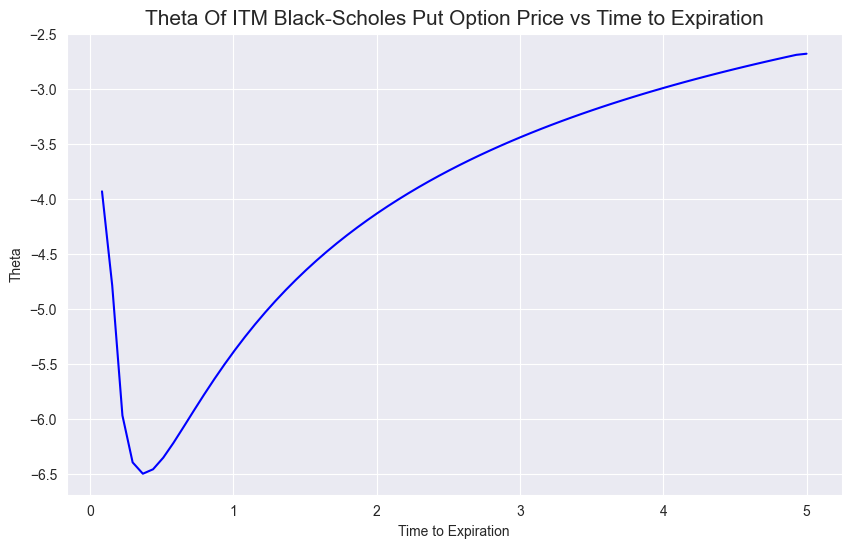

In [6]:
S0 = 100
K = 120
sigma = .3
times = np.linspace(1/12, 5, 70)

put_prices = [bs_put(S0, K, sigma, t=times[i]) for i in range(len(times))]

plt.figure(figsize = (10,6))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 15)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

theta_put = np.gradient(put_prices[::-1], times)[::-1]

plt.figure(figsize = (10,6))
plt.title("Theta Of ITM Black-Scholes Put Option Price vs Time to Expiration", size=15)
plt.plot(times, theta_put, color='blue')
plt.xlabel('Time to Expiration')
plt.ylabel('Theta')
plt.show()

### Out of money put

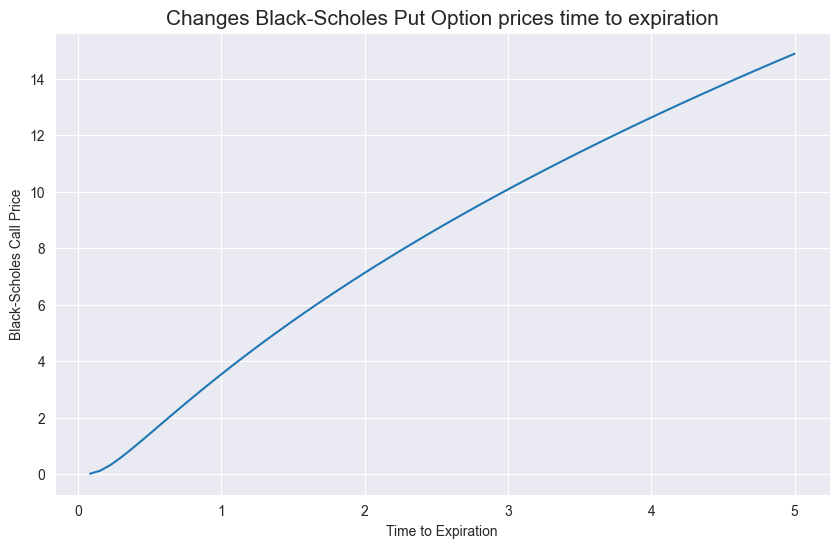

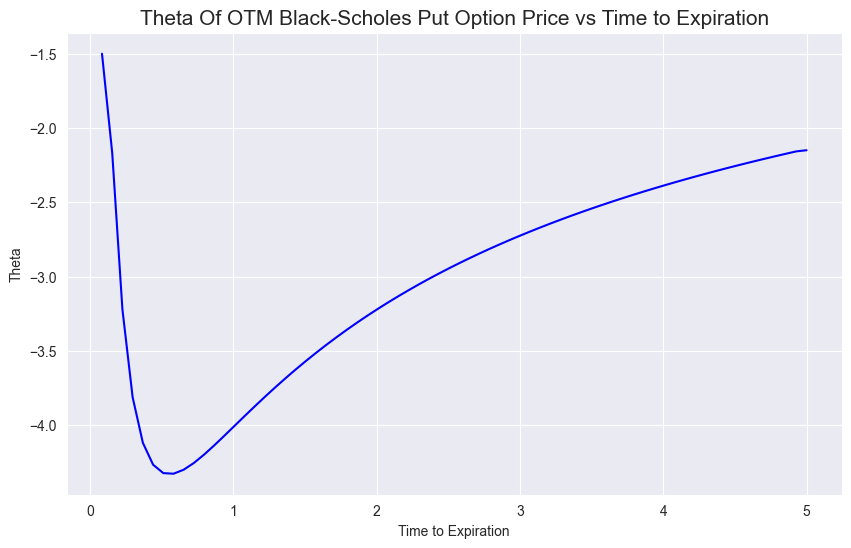

In [7]:
S0 = 100
K = 80
sigma = .3
times = np.linspace(1/12, 5, 70)

put_prices = [bs_put(S0, K, sigma, t=times[i]) for i in range(len(times))]

plt.figure(figsize = (10,6))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 15)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

theta_put = np.gradient(put_prices[::-1], times)[::-1]

plt.figure(figsize = (10,6))
plt.title("Theta Of OTM Black-Scholes Put Option Price vs Time to Expiration", size=15)
plt.plot(times, theta_put, color='blue')
plt.xlabel('Time to Expiration')
plt.ylabel('Theta')
plt.show()

## Problem (c) - 2

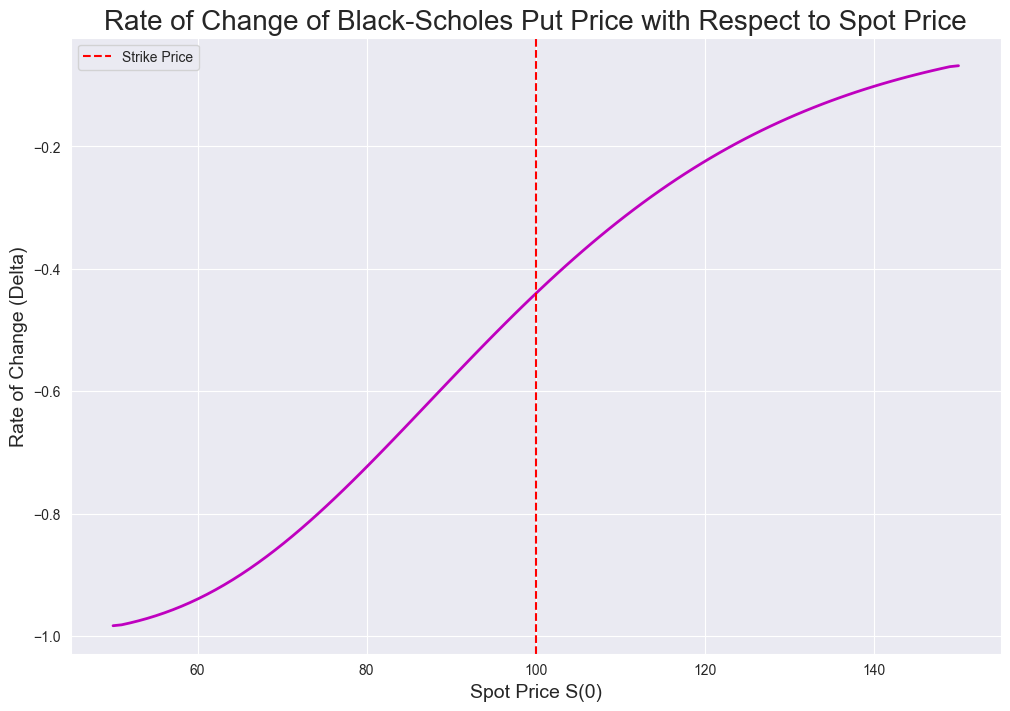

In [8]:
# Create visualization for rate of change with respect to spot price
spot_prices = np.linspace(50, 150, 100)  # Range of spot prices from 50 to 150
K = 100  # Strike price
sigma = 0.3  # Volatility
t = 1  # Time to expiration (1 year)
r = 0  # Risk-free rate

# Calculate put prices
put_prices = [bs_put(S0, K, sigma, t, r) for S0 in spot_prices]

# Calculate rate of change (derivative) using finite differences
put_delta_prices = np.gradient(put_prices, spot_prices)

plt.figure(figsize=(12, 8))
plt.plot(spot_prices, put_delta_prices, 'm-', linewidth=2)
plt.title('Rate of Change of Black-Scholes Put Price with Respect to Spot Price', size=20)
plt.xlabel('Spot Price S(0)', size=14)
plt.ylabel('Rate of Change (Delta)', size=14)
plt.grid(True)
plt.axvline(x=K, color='r', linestyle='--', label='Strike Price')
plt.legend()
plt.show()